In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np


%matplotlib inline

In [25]:
path = "Daily_funnel_KPIs.csv"

In [26]:
df = pd.read_csv(path)
df.head()

,Date,Cart Additions,Checkout Visit (e43) (event43),Start Checkout (e71) (event71),Orders,Revenue,Unique Visitors,Visits
0,"January 1, 2018",221,0,0,2588,24174.85,26065,32293
1,"January 2, 2018",9550,3637,5867,6082,502260.02,124011,144365
2,"January 3, 2018",11611,4680,7364,6475,624929.47,150293,176357
3,"January 4, 2018",13124,5243,9134,7830,514532.75,152939,183323
4,"January 5, 2018",11098,4263,7022,5019,574056.18,128820,151070


In [27]:
print (df.dtypes)

Date                               object
Cart Additions                      int64
Checkout Visit (e43) (event43)      int64
Start Checkout (e71) (event71)      int64
Orders                              int64
Revenue                           float64
Unique Visitors                     int64
Visits                              int64
dtype: object


In [28]:
df['Date']=pd.to_datetime(df['Date']).apply(lambda x: x.date())
df.head()

,Date,Cart Additions,Checkout Visit (e43) (event43),Start Checkout (e71) (event71),Orders,Revenue,Unique Visitors,Visits
0,2018-01-01,221,0,0,2588,24174.85,26065,32293
1,2018-01-02,9550,3637,5867,6082,502260.02,124011,144365
2,2018-01-03,11611,4680,7364,6475,624929.47,150293,176357
3,2018-01-04,13124,5243,9134,7830,514532.75,152939,183323
4,2018-01-05,11098,4263,7022,5019,574056.18,128820,151070


In [32]:
df.index=df['Date']
df.drop(['Date'], axis=1,inplace=True)
df.head()

,Cart Additions,Checkout Visit (e43) (event43),Start Checkout (e71) (event71),Orders,Revenue,Unique Visitors,Visits
Date,,,,,,,
2018-01-01,221,0,0,2588,24174.85,26065,32293
2018-01-02,9550,3637,5867,6082,502260.02,124011,144365
2018-01-03,11611,4680,7364,6475,624929.47,150293,176357
2018-01-04,13124,5243,9134,7830,514532.75,152939,183323
2018-01-05,11098,4263,7022,5019,574056.18,128820,151070


In [38]:
df1 = df.loc[:,['Revenue']]
df1.head()

,Revenue
Date,
2018-01-01,24174.85
2018-01-02,502260.02
2018-01-03,624929.47
2018-01-04,514532.75
2018-01-05,574056.18


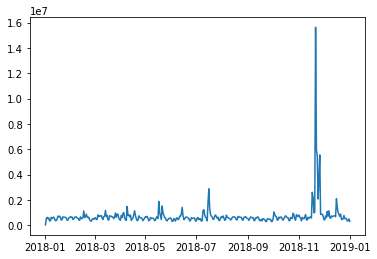

In [39]:
plt.plot(df1)

In [56]:
## run adfuller to check for statioanrity
def test_stationarity(timeseries):
    # determine rolling statistics
    rolmean= timeseries.rolling(12).mean()
    ##. rolmean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries, color = 'blue')
    mean = plt.plot(timeseries, color='red')
    std = plt.plot(timeseries, color = 'black')
    plt.legend('best')
    plt.title('plot of mean and std')
    plt.show(block=False)
    
    # print results from dickey fuller
    #print (timeseries.head())
    data1 = timeseries.iloc[:,0].values
    dftest=adfuller(data1, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)

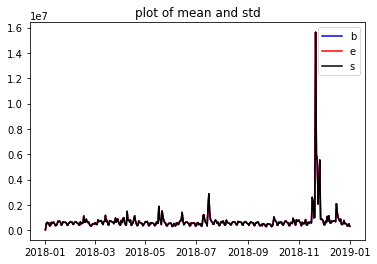

Test Statistic                -5.836862e+00
p-value                        3.858328e-07
#Lags Used                     5.000000e+00
Number of Observations Used    3.600000e+02
Critical Value (1%)           -3.448646e+00
Critical Value (5%)           -2.869602e+00
Critical Value (10%)          -2.571065e+00
dtype: float64


In [57]:
test_stationarity(df1)

In [58]:
## p-value is > than critical value so fail to reject the null hypothesis that (TS is non-stationary)

In [59]:
# Eliminating trend 

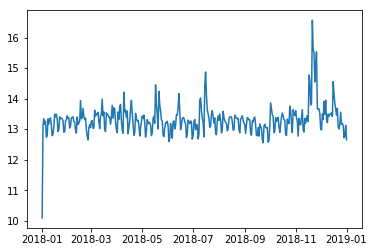

In [63]:
ts_log = np.log(df1)
plt.plot(ts_log)

In [109]:
ts_log.head()

,Revenue
Date,
2018-01-01,10.093068
2018-01-02,13.126873
2018-01-03,13.345394
2018-01-04,13.151014
2018-01-05,13.260483


In [64]:
# moving average

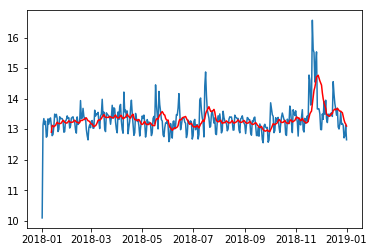

In [110]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [67]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,Revenue
Date,
2018-01-01,NaN
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-08,NaN
2018-01-09,NaN


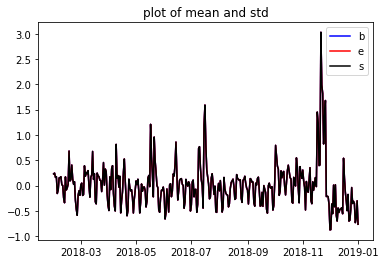

Test Statistic                  -4.273625
p-value                          0.000493
#Lags Used                      14.000000
Number of Observations Used    322.000000
Critical Value (1%)             -3.450823
Critical Value (5%)             -2.870558
Critical Value (10%)            -2.571575
dtype: float64


In [111]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

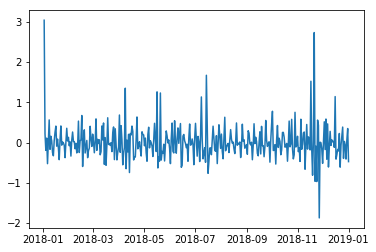

In [112]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

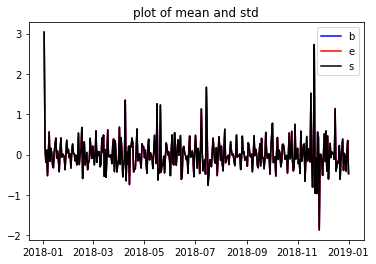

Test Statistic                -7.267261e+00
p-value                        1.622759e-10
#Lags Used                     1.300000e+01
Number of Observations Used    3.510000e+02
Critical Value (1%)           -3.449119e+00
Critical Value (5%)           -2.869810e+00
Critical Value (10%)          -2.571176e+00
dtype: float64


In [74]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:

decomposition = seasonal_decompose(ts_log.divide)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

TypeError: len() of unsized object

In [115]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [116]:
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in reduce
  umr_minimum(a, axis, None, None, keepdims),


MissingDataError: exog contains inf or nans

Text(0.5, 1.0, 'Autocorrelation Function')

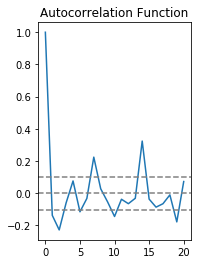

In [83]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

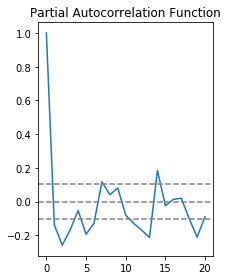

In [84]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [85]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for mult

0.0


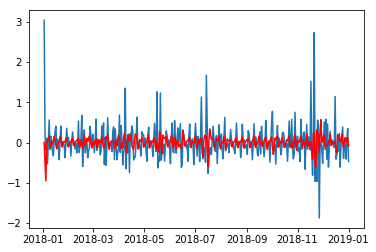

In [97]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
print (np.sum(np.sum((results_AR.fittedvalues-ts_log_diff)**2)))
#plt.title('RSS: %.4f'% np.sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


0.0


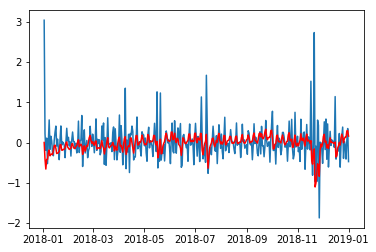

In [99]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
print (np.sum(np.sum((results_AR.fittedvalues-ts_log_diff)**2)))
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [101]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2018-01-02    0.000989
2018-01-03   -0.416633
2018-01-04   -0.658436
2018-01-05   -0.421052
2018-01-06   -0.415990
dtype: float64


In [103]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-01-02    0.000989
2018-01-03   -0.415643
2018-01-04   -1.074080
2018-01-05   -1.495131
2018-01-06   -1.911121
dtype: float64


In [104]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\v-suljai\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2018-01-01         NaN
2018-01-02    0.000989
2018-01-03   -0.415643
2018-01-04   -1.074080
2018-01-05   -1.495131
dtype: float64

In [108]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()

Date
2018-01-01         NaN
2018-01-02    1.000990
2018-01-03    0.659916
2018-01-04    0.341612
2018-01-05    0.224219
dtype: float64

NameError: name 'ts' is not defined

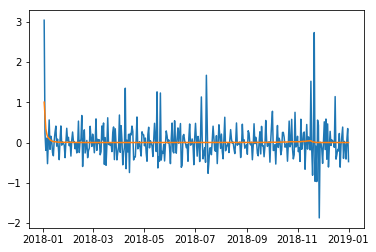

In [107]:

plt.plot(ts_log_diff)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))